In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import sys
#sys.path.insert(0, 'src')
from Plot import Plot
import plot_functions as pf

In [2]:
#### Import matplotlib
plt = pf.default_plt()

In [3]:
plot_names = [ 
"test_data/test1.dat",
"test_data/test2.dat",
"test_data/test3.dat"
]
plot_colors = {
    plot_names[0]: 'blue',
    plot_names[1]: 'green',
    plot_names[2]: 'red'
}

# xcol = [center, xmin, xmax]
xcol = [1,0,2]
# ycol = [center, ymin, ymax, statistical_error]
ycol = [3,4,5,6]

# Create plot objects
plot_objs = []
for plot_name in plot_names:
    plot_obj = Plot(plot_name, xcol, ycol)
    plot_obj.set_plot_parameters(color = plot_colors[plot_name])
    plot_obj.set_label_parameters(legend = plot_name.split("/")[-1])
    plot_obj.set_label_parameters(xlabel = "$x_{j}$ [Km]")
    plot_obj.set_label_parameters(ylabel = "$\\frac{d\Phi}{dx_{j}}$ [Km$^{-1}$]")
    
    plot_objs.append(plot_obj)

# Create also ratios of every plot wrt test2
ratio_plots = []
for plot in plot_objs:
    new_plot = plot/plot_objs[1]
    new_plot.legend = None
    ratio_plots.append(new_plot)

ratio_plots[1].set_label_parameters(ylabel = "Ratio to test2")

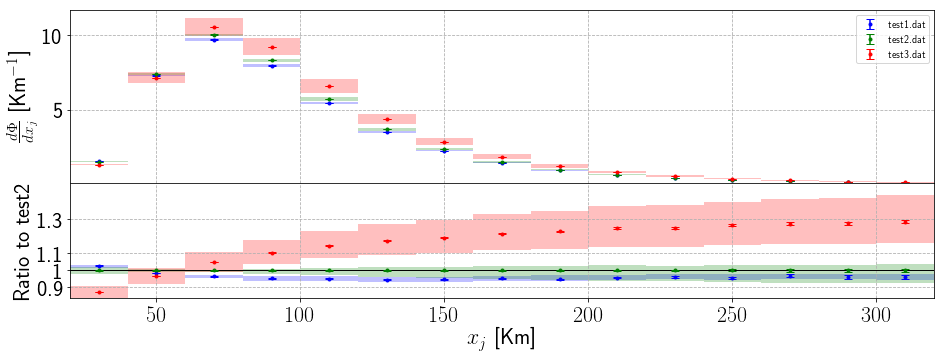

In [4]:
# Draw canvas
fig, axes = pf.canvas_plot_and_ratio(plt, ratio_range = (0.7, 1.5))
#axes[0].set_yscale('log')

for plot in plot_objs:
    axes[0].gnu_errorbar(plot)
    axes[0].draw_boxxyerrorbar(plot)
    
for plot in ratio_plots:
    axes[1].draw_boxxyerrorbar(plot)
    axes[1].gnu_errorbar(plot)

#plt.savefig("test.png", bbox_inches="tight")